<h1>WGU D212 TASK 2 REV 6 - MATTINSON</h1>
PCA or General Factor Analysis

## Import required libraries to get started

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Read dataset from .csv file

In [2]:
churn = pd.read_csv('data/churn_clean.csv')

## Define continuous features

In [3]:
# define continuous features
# start with numerical data
# then remove non-continuous data
features = churn.select_dtypes(include=['number']).columns.tolist()
features.remove('CaseOrder') # id type field, non-continuous
features.remove('Zip') # non-continuous
features.remove('Item1') # non-continuous
features.remove('Item2') # non-continuous
features.remove('Item3') # non-continuous
features.remove('Item4') # non-continuous
features.remove('Item5') # non-continuous
features.remove('Item6') # non-continuous
features.remove('Item7') # non-continuous
features.remove('Item8') # non-continuous
features

['Lat',
 'Lng',
 'Population',
 'Children',
 'Age',
 'Income',
 'Outage_sec_perweek',
 'Email',
 'Contacts',
 'Yearly_equip_failure',
 'Tenure',
 'MonthlyCharge',
 'Bandwidth_GB_Year']

## Create dataframe of churn data with numerical values (continuous variables)

In [4]:
df = pd.DataFrame(churn,columns=features)

## Explore dataframe

In [5]:
# explore data
print(df.head().round(3).T)
print(df.info())
print(df.shape)

                              0          1         2          3          4
Lat                      56.251     44.329    45.356     32.967     29.380
Lng                    -133.376    -84.241  -123.247   -117.248    -95.807
Population               38.000  10446.000  3735.000  13863.000  11352.000
Children                  0.000      1.000     4.000      1.000      0.000
Age                      68.000     27.000    50.000     48.000     83.000
Income                28561.990  21704.770  9609.570  18925.230  40074.190
Outage_sec_perweek        7.978     11.699    10.753     14.914      8.147
Email                    10.000     12.000     9.000     15.000     16.000
Contacts                  0.000      0.000     0.000      2.000      2.000
Yearly_equip_failure      1.000      1.000     1.000      0.000      1.000
Tenure                    6.796      1.157    15.754     17.087      1.671
MonthlyCharge           172.456    242.633   159.948    119.957    149.948
Bandwidth_GB_Year       9

## Scale the data

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

## fit scaler to the data

In [8]:
scaler.fit(df)

StandardScaler()

## create dataframe using scaled data

In [9]:
scaled_df = pd.DataFrame(scaler.transform(df), columns = features)
print(scaled_df.head().round(3).T)
print(scaled_df.info())
print(scaled_df.shape)

                          0      1      2      3      4
Lat                   3.217  1.025  1.214 -1.065 -1.725
Lng                  -2.810  0.432 -2.142 -1.746 -0.332
Population           -0.673  0.048 -0.417  0.285  0.111
Children             -0.972 -0.507  0.891 -0.507 -0.972
Age                   0.721 -1.260 -0.149 -0.245  1.446
Income               -0.399 -0.642 -1.071 -0.741  0.009
Outage_sec_perweek   -0.680  0.570  0.252  1.651 -0.623
Email                -0.666 -0.005 -0.997  0.986  1.317
Contacts             -1.006 -1.006 -1.006  1.018  1.018
Yearly_equip_failure  0.947  0.947  0.947 -0.626  0.947
Tenure               -1.049 -1.262 -0.710 -0.660 -1.243
MonthlyCharge        -0.004  1.630 -0.295 -1.227 -0.528
Bandwidth_GB_Year    -1.138 -1.186 -0.612 -0.562 -1.428
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   L

## export scaled data to .CSV file

In [10]:
scaled_df.to_csv('tables\scaled_df.csv', index=False, header=True)

## import PCA from sklearn

In [11]:
from sklearn.decomposition import PCA

## fit PCA to scaled data

In [12]:
pca = PCA().fit(scaled_df)
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
pc_labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]

Visualize Scree Plot

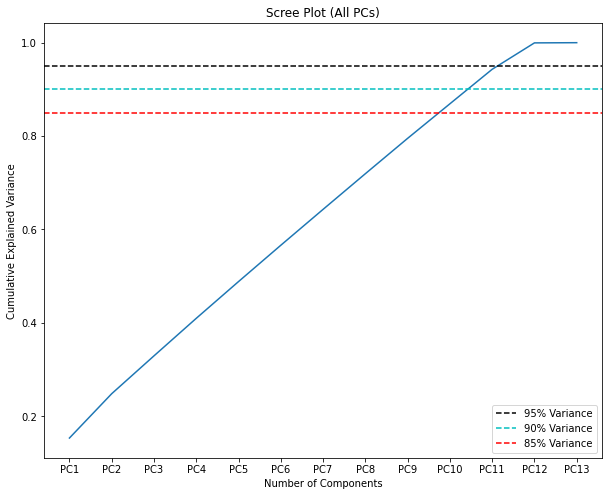

In [13]:
# create scree plot
fig, ax = plt.subplots(figsize =(10, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Scree Plot (All PCs)')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
ax.set_xticks(range(0,13))
ax.set_xticklabels(pc_labels)
plt.axhline(y = .95, color='k', linestyle='--', label = '95% Variance')
plt.axhline(y = .90, color='c', linestyle='--', label = '90% Variance')
plt.axhline(y = .85, color='r', linestyle='--', label = '85% Variance')
plt.legend(loc='best')
plt.show()

## Principal Component Algorithm (All PCs) - 100%

In [14]:
pca = PCA() # do not specify number of components or accuracy
x_pca = pca.fit_transform(scaled_df)

In [15]:
print('Numpy covariance matrix: \n%s' %np.cov(x_pca.T).round(3))

Numpy covariance matrix: 
[[ 1.995 -0.     0.     0.    -0.     0.     0.     0.     0.     0.
   0.     0.     0.   ]
 [-0.     1.234  0.     0.    -0.    -0.    -0.    -0.     0.     0.
   0.     0.     0.   ]
 [ 0.     0.     1.054  0.    -0.     0.     0.    -0.     0.    -0.
  -0.     0.    -0.   ]
 [ 0.     0.     0.     1.045 -0.     0.    -0.     0.     0.     0.
   0.    -0.    -0.   ]
 [-0.    -0.    -0.    -0.     1.023  0.     0.     0.    -0.    -0.
   0.     0.     0.   ]
 [ 0.    -0.     0.     0.     0.     1.011 -0.     0.    -0.     0.
  -0.     0.    -0.   ]
 [ 0.    -0.     0.    -0.     0.    -0.     0.999  0.     0.    -0.
  -0.    -0.    -0.   ]
 [ 0.    -0.    -0.     0.     0.     0.     0.     0.993  0.     0.
  -0.    -0.     0.   ]
 [ 0.     0.     0.     0.    -0.    -0.     0.     0.     0.985  0.
   0.    -0.    -0.   ]
 [ 0.     0.    -0.     0.    -0.     0.    -0.     0.     0.     0.962
  -0.    -0.    -0.   ]
 [ 0.     0.    -0.     0.     0.    -0. 

In [16]:
scaled_df.shape

(10000, 13)

In [17]:
x_pca.shape

(10000, 13)

In [18]:
print((pca.explained_variance_ratio_*100).round(3))
print((np.cumsum(pca.explained_variance_ratio_*100).round(3)))

[15.344  9.493  8.105  8.035  7.871  7.774  7.686  7.635  7.573  7.398
  7.388  5.656  0.042]
[ 15.344  24.836  32.942  40.977  48.847  56.622  64.308  71.943  79.516
  86.914  94.302  99.958 100.   ]


In [19]:
print('Variance explained by principal components = ', 
      sum(pca.explained_variance_ratio_*100).round(3))

Variance explained by principal components =  100.0


In [20]:
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
pc_labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]
print(per_var.shape)

(13,)


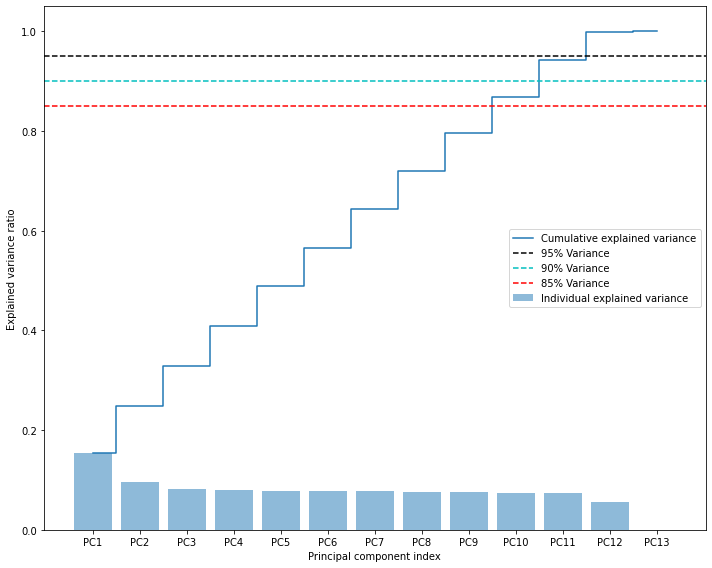

In [42]:
# code adapted from https://vitalflux.com/pca-explained-variance-concept-python-example/
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
fig, ax1 = plt.subplots()
fig.set_size_inches(10,8)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center',
        tick_label=pc_labels, label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
ax1.axhline(y = .95, color='k', linestyle='--', label = '95% Variance')
ax1.axhline(y = .90, color='c', linestyle='--', label = '90% Variance')
ax1.axhline(y = .85, color='r', linestyle='--', label = '85% Variance')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

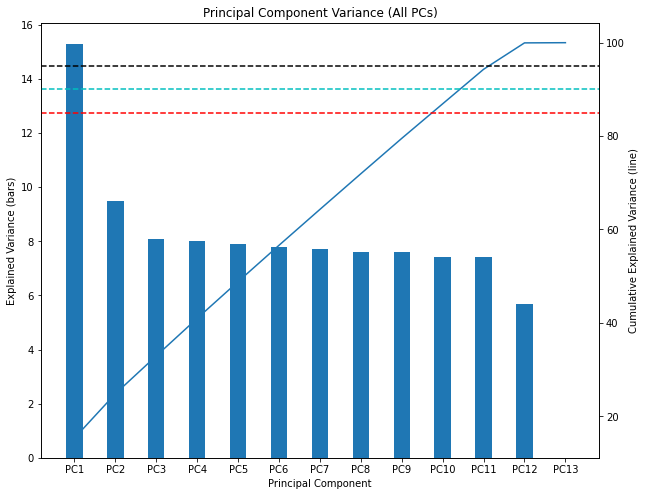

In [21]:
# create principal component variance
#plt.figure(figsize=(10,8))
x = range(1,len(per_var)+1)
fig, ax1 = plt.subplots()
fig.set_size_inches(10,8)
ax1.bar(x, height=per_var, width=0.4, align='center', tick_label=pc_labels)
ax2 = ax1.twinx()
ax2.plot(x, np.cumsum(pca.explained_variance_ratio_*100).round(3))
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance (bars)')
ax1.set_title('Principal Component Variance (All PCs)')
ax2.set_ylabel('Cumulative Explained Variance (line)')
ax2.axhline(y = 95, color='k', linestyle='--', label = '95% Variance')
ax2.axhline(y = 90, color='c', linestyle='--', label = '90% Variance')
ax2.axhline(y = 85, color='r', linestyle='--', label = '85% Variance')
plt.show()

In [36]:
print('Variance explained by the first principal component = ' ,
      np.cumsum(pca.explained_variance_ratio_*100)[0])
print('Variance explained by the first 2 principal components = ' ,
      np.cumsum(pca.explained_variance_ratio_*100)[1])
print('Variance explained by all 13 principal components = ' ,
      np.cumsum(pca.explained_variance_ratio_*100)[12])

Variance explained by the first principal component =  15.343888168137699
Variance explained by the first 2 principal components =  24.83641162467388
Variance explained by all 13 principal components =  100.0


## Two-dimensions captured 26.90% of variability

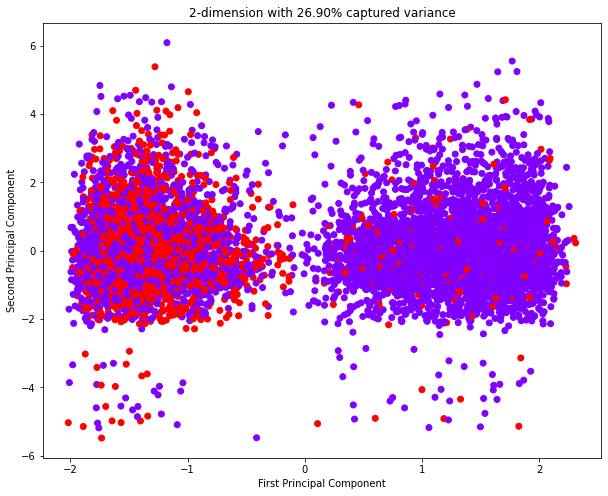

In [23]:
churn['Churn'] = churn['Churn'].map({'Yes': True, 'No': False})
plt.figure(figsize=(10,8))
plt.scatter(x_pca[:,0],x_pca[:,1], c=churn['Churn'], cmap='rainbow')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('2-dimension with 26.90% captured variance')
plt.show()

In [24]:
pca.components_.round(3)

array([[-0.023,  0.008, -0.001,  0.014,  0.002,  0.004,  0.006, -0.02 ,
         0.004,  0.018,  0.705,  0.04 ,  0.707],
       [-0.714,  0.181,  0.653, -0.014,  0.053, -0.055,  0.009,  0.152,
         0.031, -0.007, -0.009, -0.004, -0.01 ],
       [-0.032, -0.286,  0.152,  0.448, -0.444,  0.196, -0.25 , -0.093,
        -0.448,  0.154,  0.007, -0.404,  0.008],
       [ 0.109, -0.737,  0.322, -0.465,  0.227, -0.042, -0.126, -0.145,
         0.109,  0.063,  0.027, -0.136, -0.003],
       [-0.095,  0.345, -0.12 , -0.107,  0.437,  0.313, -0.456, -0.353,
         0.011,  0.42 ,  0.009, -0.218, -0.022],
       [-0.031, -0.088,  0.099,  0.131, -0.096,  0.1  ,  0.598, -0.403,
         0.082,  0.592, -0.037,  0.257, -0.013],
       [-0.011, -0.052,  0.054,  0.035, -0.188,  0.774,  0.052,  0.004,
         0.52 , -0.291, -0.002, -0.041,  0.004],
       [-0.02 , -0.086,  0.079, -0.066,  0.093,  0.335, -0.185, -0.125,
        -0.511, -0.195, -0.038,  0.714,  0.003],
       [ 0.09 , -0.172, -0.027, 

Create a dataframe of PCs and relationship to the original features

In [28]:
pca_comp = pd.DataFrame(pca.components_,
        columns=features,index=pc_labels)
print(pca_comp.round(2))

       Lat   Lng  Population  Children   Age  Income  Outage_sec_perweek  \
PC1  -0.02  0.01       -0.00      0.01  0.00    0.00                0.01   
PC2  -0.71  0.18        0.65     -0.01  0.05   -0.05                0.01   
PC3  -0.03 -0.29        0.15      0.45 -0.44    0.20               -0.25   
PC4   0.11 -0.74        0.32     -0.46  0.23   -0.04               -0.13   
PC5  -0.09  0.34       -0.12     -0.11  0.44    0.31               -0.46   
PC6  -0.03 -0.09        0.10      0.13 -0.10    0.10                0.60   
PC7  -0.01 -0.05        0.05      0.03 -0.19    0.77                0.05   
PC8  -0.02 -0.09        0.08     -0.07  0.09    0.34               -0.18   
PC9   0.09 -0.17       -0.03      0.19  0.34    0.25                0.06   
PC10  0.02 -0.15        0.06      0.44 -0.08   -0.28               -0.52   
PC11  0.05 -0.11        0.10      0.57  0.61   -0.03                0.22   
PC12  0.67  0.38        0.63     -0.01 -0.04    0.01               -0.03   
PC13  0.00  

Text(0.5, 1.0, 'Principal Component Matrix')

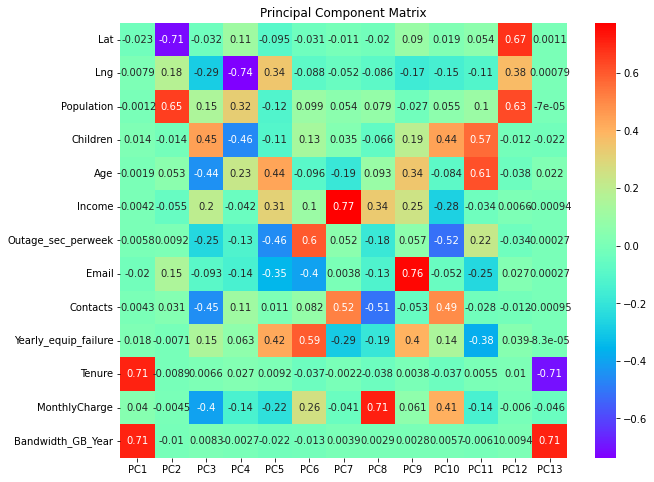

In [26]:
# create principal component matrix
plt.figure(figsize=(10,8))
sns.heatmap(pca_comp.T,cmap='rainbow',
           annot=True,fmt='.2g')
plt.title('Principal Component Matrix')

In [31]:
col_list = scaled_df.columns

In [35]:
pc_load = pd.DataFrame(pca.components_.T, columns=pc_labels, index=scaled_df.columns)
print(pc_load)

                           PC1       PC2       PC3       PC4       PC5  \
Lat                  -0.023161 -0.714010 -0.031715  0.109414 -0.094872   
Lng                   0.007911  0.180879 -0.285753 -0.736871  0.344620   
Population           -0.001230  0.653439  0.151916  0.322012 -0.119517   
Children              0.014244 -0.014267  0.447882 -0.464670 -0.107498   
Age                   0.001860  0.052795 -0.443537  0.227235  0.436759   
Income                0.004185 -0.054602  0.195742 -0.041772  0.312779   
Outage_sec_perweek    0.005811  0.009174 -0.249550 -0.126214 -0.455981   
Email                -0.020020  0.152355 -0.092711 -0.144998 -0.353186   
Contacts              0.004283  0.031043 -0.447906  0.108875  0.011245   
Yearly_equip_failure  0.017665 -0.007070  0.153686  0.063449  0.420468   
Tenure                0.705211 -0.008913  0.006569  0.026652  0.009197   
MonthlyCharge         0.040456 -0.004500 -0.404228 -0.136041 -0.218356   
Bandwidth_GB_Year     0.706719 -0.0104